In [12]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)
base = finesse.kat()

base.parse("""
#========= constants ===============
# OMC distance 
const d1 0.357316M
const d2 0.359284M
const aoiomc 3.0
#========= source ===============

maxtem 1

l i1 1 0 nsr

s srmmt1 5.630 nsr nom1

# Laser mode

tem i1 0 0 1.0 0.0
tem i1 0 1 1.0 0.0
tem i1 1 0 1.0 90.0

# SRM->OMMT1

bs mmt1 0.99997 0.00003 0 3.07 nom1 nom2 nom1t nom2t

# OMMT1->OMMT2
s smmt12 2.60 nom2 nom3
bs mmt2 0.99997 0.00003 0 -3.07 nom3 nom4 nom3t nom4t


# OMMT RC
attr mmt1 Rc 13.16
attr mmt2 Rc 44.39


# OMMT2->OSTM
s ostm1 2.9700 nom4 nom5
bs ostm 0.99997 0.00003 0 45 nom5 nom6 nom5t nom6t

# OSTM->OBS1
s ostmobs1 0.3000 nom6 nom7
bs obs1 0.9950 0.005 0 45 nom7 nom8 nom7t nom8t

#OBS1->OMC1
s bsomc1 0.03 nom8 n1

# OMC1
bs omc1 0.996 0.004 0 -$aoiomc n1 nn2 n2 n9 
s omc12 0.357316 n2 n3

# OMC2
bs omc2 0.996 0.004 0 $aoiomc n3 n4 n33 nn3
s omc23 0.359284 n4 n5

# OMC2 to PD
s somc2pd 1 n33 npd

# OMC3
bs omc3 0.99996 0.00004 0 -$aoiomc n5 n6 n55 nn4
s omc34 0.357316 n6 n7

# OMC4
bs omc4 0.99996 0.00004 0 -$aoiomc n7 n8 nn1 n88
s omc41 0.359284 n8 n9



# OMC RC
attr omc3 Rc 1.8
attr omc4 Rc 1.8
attr omc1 Rc 0
attr omc2 Rc 0

#cavity
cav OMC_ring omc1 n2 omc1 n9


# amp detector
#ad OMC_TR 0 npd
#xaxis omc1 phi lin -0.0025 0.0025 2400
#yaxis abs
trace 2


beam b1 npd


xaxis  b1 x lin -3 3 80
x2axis b1 y lin -3 3 80


""")


Parsing `tem i1 0 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem i1 0 1 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem i1 1 0 1.0 90.0` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2020-11-04 15:46:50.901675
Used Finesse None at C:\ProgramData\Anaconda3\Library\bin\kat.exe

Finished in 0.102008 seconds


C:\ProgramData\Anaconda3\lib\site-packages\pykat\finesse.py:2114: UserWarning: 'KatRun2D' does not have attribute called 'katPath'
  r.katPath = kat_exec
100% | ETA:  0:00:00 | Calculating                                             C:\ProgramData\Anaconda3\lib\site-packages\pykat\finesse.py:2345: UserWarning: 'KatRun2D' does not have attribute called 'save_output'
  r.save_output = save_output
C:\ProgramData\Anaconda3\lib\site-packages\pykat\finesse.py:2362: UserWarning: 'KatRun2D' does not have attribute called 'save_input'
  r.save_input = save_kat


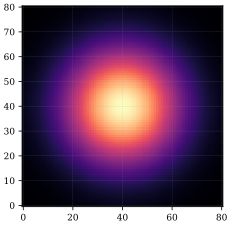

In [14]:
out = base.run()
plt.imshow(out['b1'])
plt.show()